In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def train(Ph, theta = 0.001):
    V = np.ones(100)*10 #init Value of each state
    # V[99] = 1 # terminal state
    V[0] = 0 # terminal state
    pi = np.zeros(100) # policy
    iter = 0
    while True:
        Delta = 0
        for s in range(1, 100):
            old_v = V[s] # old value of state s
            v = [0] * 51 # stake values
            for a in range(1, min(s,100-s)+1): # loop over all possible stakes
                if s+a == 100: # if chance to end the game with 100 dollars
                    v[a] += Ph # win
                    v[a] += (1-Ph) * V[s-a] # lose
                elif s+a < 100: # if no chance to end the game
                    v[a] += Ph * V[s+a] # win
                    v[a] += (1-Ph) * V[s-a] # lose
                 
            best_stake = np.argmax(v) # grab the best stake
            V[s] = v[best_stake] # update value of state s, with the value of the best stake, v(a)
            pi[s] = best_stake # update policy of state s, with the best stake, a
            Delta = max(Delta, abs(old_v - V[s])) #update delta
        if iter % 1000 == 0:
            print(f'iter={iter}, Delta={Delta}')
        if Delta < theta:
            print(f'iter={iter}, Delta={Delta}')
            break
        iter += 1

    fig, ax = plt.subplots(2, 1)
    fig.suptitle(f'Ph={Ph}, Theta={theta}')
    ax[0].plot(V[1:100])
    ax[0].set_title('Value function')
    ax[1].bar(np.arange(1,100),pi[1:100])
    ax[1].set_title('Policy')


iter=0, Delta=6.0
iter=396, Delta=5.820253395818348e-08
iter=0, Delta=4.95
iter=1000, Delta=0.0027360935957583266
iter=2000, Delta=8.66760371029951e-05
iter=3000, Delta=1.1763581151402747e-06
iter=3432, Delta=9.938094591710467e-08
iter=0, Delta=7.5
iter=95, Delta=4.80418821025057e-08


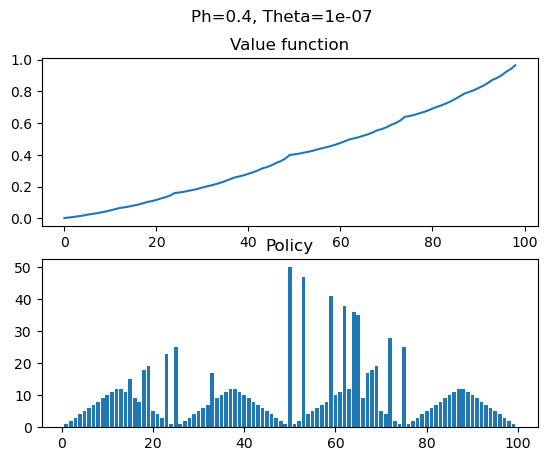

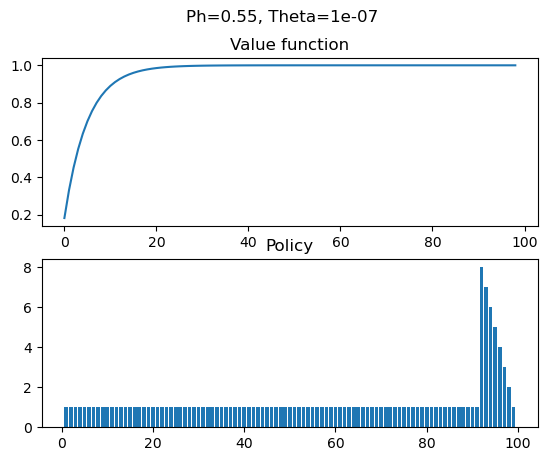

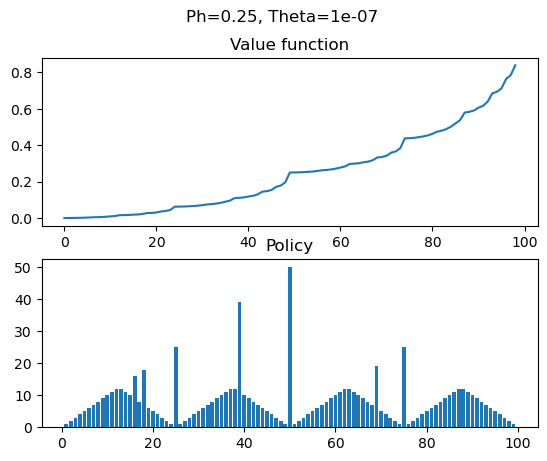

In [63]:
theta = 1e-7
train(0.4, theta)
train(0.55, theta)
train(0.25, theta)
